---
# $\text{PARTE PRÁCTICA CORRESPONDIENTE AL SEGUNDO PARCIAL.}$
## $\text{Jonathan David Quintero Garzón - 2230980}$
## $\text{Mariangel Martinez Caicedo - 2221234}$
## $\text{Carol Silvana Sanabria Daza - 2210687}$
---
1. Introducción.
2. Respecto a las variables:
3.  Importados.
4. Conclusiones.
5. Referencias.
---

##$\text{1. Introducción.}$


En el presente trabajo se realiza un análisis estadístico de los datos correspondientes a los nacimientos en Colombia durante el año 2023, a partir de la información suministrada por el DANE y recopilada a través del sistema RUAF-ND. El estudio se centra en dos variables clave: la talla al nacer (TALLA_NAC) y el tiempo de gestación (T_GES), las cuales representan indicadores fundamentales del desarrollo fetal y del estado de salud neonatal. A través de una limpieza y transformación de los datos, se construyeron visualizaciones y se aplicaron pruebas estadísticas que permitieron examinar la distribución de cada variable, así como su posible relación. De este modo, este análisis no solo permite identificar patrones relevantes en el crecimiento y madurez gestacional, sino también aportar evidencia útil para orientar políticas de salud materno-infantil y mejorar la atención prenatal en el país.


---

##$\text{2. Respecto a las variables.}$

Las variables estudiadas provienen de la base de datos $\text{BD-EEVV-Nacimientos-2023}$, correspondiente a las estadísticas de nacimientos  provenientes de los certificados de nacido vivo, la cual se acopia y consolida por las diferentes subdivisiones geográficas (regiones, departamentos y municipios) y por los diferentes grupos de población (etnias) en el territorio nacional.

Las bases de datos permiten obtener información por área, sexo, según departamento y municipio de ocurrencia, departamento y municipio de residencia de la madre; esta información se constituye en fuente básica para el cálculo de indicadores como tasa bruta de natalidad, tasas de fecundidad y tasa de mortalidad infantil, así como diseñar planes en salud y política social.

**VARIABLE: TALLA_NAC**

- Definición: Talla del nacido vivo, al nacer
- Tipo de variable: Cualitativa discreta.
- Importancia: La talla de un recién nacido es un indicador clave del crecimiento intrauterino y del estado de salud al nacer. Permite detectar riesgos, construir curvas de crecimiento y evaluar factores maternos y socioeconómicos. Es fundamental en estudios de salud pública y desarrollo infantil.
- Intervalos: 1 = Menos de 20, 2 = 20-29, 3 = 30-39, 4 = 40-49, 5 = 50-59, 6 = 60 y Más, 9 = Sin información

**VARIABLE: T_GES**
- Definición: Tiempo de gestación del nacido vivo
- Tipo de variable: Cualitativa discreta.
- Importancia: El tiempo de gestación es clave para determinar la madurez y viabilidad del recién nacido. Permite identificar nacimientos prematuros o postérmino, asociando riesgos de salud. Es esencial para evaluar la calidad del control prenatal y orientar intervenciones médicas.
- Intervalos: 1 = Menos de 22, 2 = De 22 a 27, 3 = De 28 a 37, 4 = De 38 a 41, 5 = De 42 y más, 6 = Ignorado, 9 = Sin información

El Departamento Administrativo Nacional de Estadística (DANE) de Colombia no utiliza un muestreo para recolectar los datos de las estadísticas vitales, como nacimientos y defunciones. En cambio, emplea un enfoque de registro continuo y exhaustivo, recopilando información de todos los eventos registrados en el país. Esta información se obtiene principalmente a través del Registro Civil y el Registro Único de Afiliación en Salud – Nacimientos y Defunciones (RUAF-ND), garantizando una cobertura completa y precisa de los datos vitales.

Este sistema permite al DANE generar estadísticas vitales detalladas y confiables, fundamentales para el análisis demográfico, la planificación de políticas públicas y el seguimiento de indicadores de salud y desarrollo en Colombia.


---

##$\text{3. Importados.}$

In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import math

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [ ]:
io_csv = io.BytesIO(uploaded["BD-EEVV-Nacimientos-2023.csv"])
tabla = pd.read_csv(io_csv, sep=',', index_col=0, encoding="latin-1")

tabla1 = tabla[["T_GES","TALLA_NAC"]]

df1=tabla1[(tabla1.TALLA_NAC != 9) & (tabla1.T_GES != 9)]
df1.head(10)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5
11,4,5
5,4,4
5,3,4
52,4,5
11,4,5


In [ ]:
df1.TALLA_NAC = df1.TALLA_NAC.astype(str)
df1.TALLA_NAC.head(4)

<ipython-input-6-a35a92bc174c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TALLA_NAC = df1.TALLA_NAC.astype(str)


,TALLA_NAC
COD_DPTO,
23,5
11,4
11,4
11,5


In [ ]:
df1.T_GES = df1.T_GES.astype(str)
df1.T_GES.head(4)

<ipython-input-7-d0fe5be781fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.T_GES = df1.T_GES.astype(str)


,T_GES
COD_DPTO,
23,4
11,4
11,4
11,4


In [ ]:
df1.loc[(df1.TALLA_NAC =="1"),"TALLA_NAC"] = "< 20"
df1.loc[(df1.TALLA_NAC =="2"),"TALLA_NAC"] = "20-29"
df1.loc[(df1.TALLA_NAC =="3"),"TALLA_NAC"] = "30-39"
df1.loc[(df1.TALLA_NAC =="4"),"TALLA_NAC"] = "40-49"
df1.loc[(df1.TALLA_NAC =="5"),"TALLA_NAC"] = "50-59"
df1.loc[(df1.TALLA_NAC =="6"),"TALLA_NAC"] = "> 60"
df1.loc[(df1.TALLA_NAC =="9"),"TALLA_NAC"] = "NA"


df1.loc[(df1.T_GES =="1"),"T_GES"] = "< 22"
df1.loc[(df1.T_GES =="2"),"T_GES"] = "22-27"
df1.loc[(df1.T_GES =="3"),"T_GES"] = "28-37"
df1.loc[(df1.T_GES =="4"),"T_GES"] = "38-41"
df1.loc[(df1.T_GES =="5"),"T_GES"] = "> 42"
df1.loc[(df1.T_GES =="6"),"T_GES"] = "IGNORADO"
df1.loc[(df1.T_GES =="9"),"T_GES"] = "NA"

### $\text{Gráficas para Talla de un recien nacido en Colombia}$

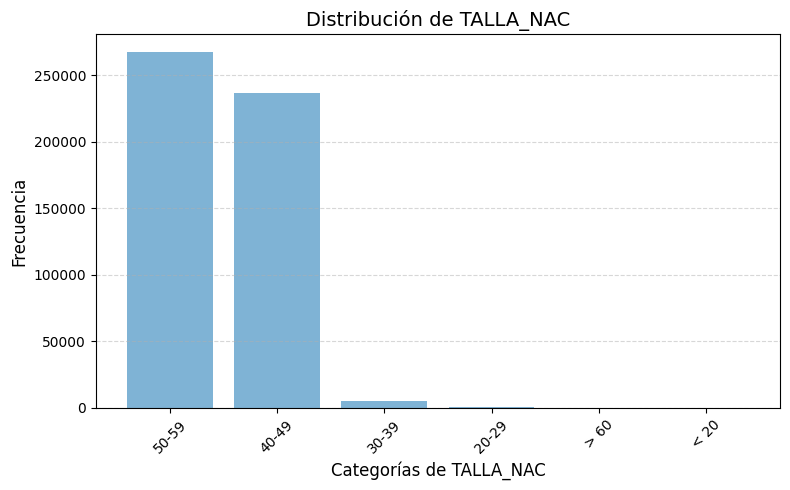

In [ ]:

x_values = df1.TALLA_NAC.unique()
y_values = df1.TALLA_NAC.value_counts().tolist()

plt.figure(figsize=(8, 5))
plt.bar(x_values, y_values, color="#7FB3D5")

plt.title("Distribución de TALLA_NAC", fontsize=14)
plt.xlabel("Categorías de TALLA_NAC", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

La distribución de la talla al nacer **(TALLA_NAC)** muestra una clara concentración en los rangos **50-59 cm y 40-49 cm**, siendo el primero el más frecuente. Estos dos rangos abarcan prácticamente la totalidad de los registros, lo cual indica que la mayoría de los nacimientos se dan con tallas consideradas **normales o esperadas** según los estándares neonatales.

En contraste, las categorías extremas como **"< 20", "20-29", "30-39" y "> 60"** presentan frecuencias muy bajas, lo que sugiere que nacimientos con tallas atípicas son **poco comunes** en esta población.

Esta distribución refleja una tendencia central bien definida y puede ser útil para detectar casos atípicos o anómalos en controles neonatales.

In [ ]:
sizes=np.array(y_values)
sizes

array([267220, 236205,   5071,    307,     20,      4])

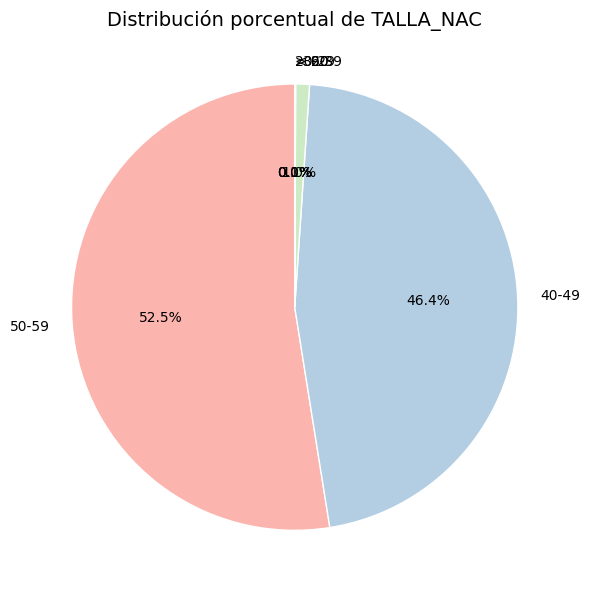

In [ ]:

x_values = df1.TALLA_NAC.unique()
y_values = df1.TALLA_NAC.value_counts().tolist()


plt.figure(figsize=(6, 6))
colors = plt.cm.Pastel1.colors

plt.pie(
    y_values,
    labels=x_values,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)


plt.title("Distribución porcentual de TALLA_NAC", fontsize=14)
plt.axis('equal')


plt.tight_layout()
plt.show()


In [ ]:
len(df1.TALLA_NAC)

508827

In [ ]:
porcentaje = [(x/len(df1.TALLA_NAC)*100) for x in y_values]
print(x_values)
print(porcentaje)

['50-59' '40-49' '30-39' '20-29' '> 60' '< 20']
[52.516867225992335, 46.421475275486564, 0.9966059191041355, 0.060334848583113714, 0.0039306090282158765, 0.0007861218056431753]


Aproximadamente el **52.5%** de los recién nacidos en Colombia presentan una talla entre **50 y 59 cm**, lo que representa la categoría más frecuente. Le sigue el rango de **40 a 49 cm**, con un **46.4%**. Estas dos categorías abarcan la **gran mayoría de los nacimientos**, lo que evidencia que las tallas al nacer en la población colombiana se encuentran mayoritariamente dentro de los valores considerados normales.

En contraste, las demás categorías como **30–39 cm, 20–29 cm, < 20 cm y > 60 cm** tienen una representación inferior al **1%**, indicando que los nacimientos con tallas fuera del rango típico son **poco comunes**.

Este comportamiento sugiere un patrón de crecimiento fetal saludable en la mayoría de los casos, aunque también resalta la importancia de monitorear adecuadamente los extremos por su posible asociación con condiciones clínicas específicas.

### $\text{Gráficas para T_Ges}$

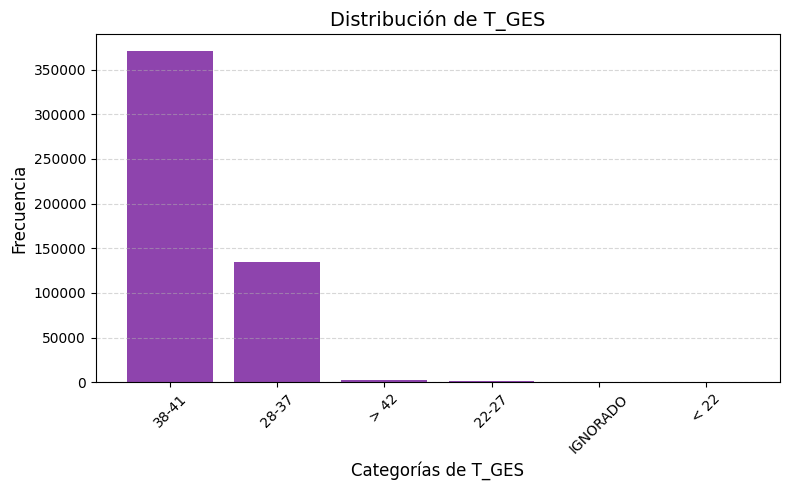

In [ ]:

x_values = df1.T_GES.unique()
y_values = df1.T_GES.value_counts().tolist()

plt.figure(figsize=(8, 5))
plt.bar(x_values, y_values, color="#8E44AD")

plt.title("Distribución de T_GES", fontsize=14)
plt.xlabel("Categorías de T_GES", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


La mayoría de los recién nacidos en Colombia tienen una edad gestacional entre **38 y 41 semanas**, lo cual corresponde a una gestación **a término**, con más de **360,000 casos**. Esta categoría representa la condición ideal para el nacimiento, en la que se espera un desarrollo fetal completo y adecuado.

El segundo grupo más frecuente corresponde a las edades gestacionales entre **28 y 37 semanas**, es decir, **nacimientos prematuros**, con más de **130,000 casos**. Aunque menos comunes, su presencia en la distribución indica que una proporción importante de nacimientos ocurre antes de alcanzar la gestación completa.

Las demás categorías, como **< 22 semanas, 22–27 semanas, > 42** semanas o registros **ignorados**, presentan una frecuencia mínima, lo que podría indicar tanto **casos excepcionales** como posibles **errores de registro o datos incompletos**.

Esta distribución refleja una tendencia positiva en términos de salud materno-infantil, pero también destaca la necesidad de reforzar acciones para reducir el número de nacimientos prematuros.

In [ ]:
sizes=np.array(y_values)
sizes

array([371090, 134513,   1950,    778,    477,     19])

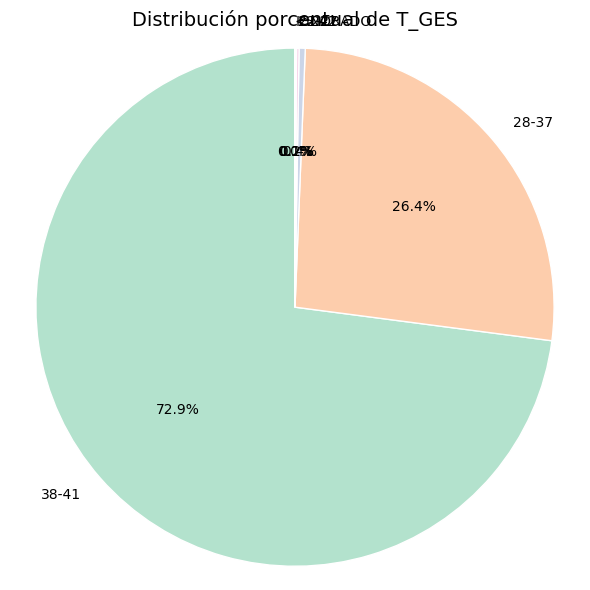

In [ ]:

x_values = df1.T_GES.unique()
y_values = df1.T_GES.value_counts().tolist()


plt.figure(figsize=(6, 6))
colors = plt.cm.Pastel2.colors

plt.pie(
    y_values,
    labels=x_values,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)


plt.title("Distribución porcentual de T_GES", fontsize=14)
plt.axis('equal')


plt.tight_layout()
plt.show()


In [ ]:
len(df1.T_GES)

508827

In [ ]:
porcentaje = [(x/len(df1.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

['38-41' '28-37' '> 42' '22-27' 'IGNORADO' '< 22']
[72.93048521403149, 26.43590061062011, 0.383234380251048, 0.1529006911975976, 0.09374502532294866, 0.003734078576805083]


Al analizar la distribución porcentual de la edad gestacional (T_GES), se observa que aproximadamente el **72.9%** de los recién nacidos en Colombia nacen entre las **38 y 41 semanas**, lo que corresponde a una gestación a término y refleja una condición de salud materno-fetal **óptima y predominante** en la población.

Un **26.4%** de los nacimientos se produce entre las **28 y 37 semanas**, lo que indica una proporción significativa de **nacimientos prematuros** que podrían requerir cuidados neonatales especiales.

Las demás categorías **42 semanas (0.38%), 22–27 semanas (0.15%), < 22 semanas (0.003%) y casos ignorados (0.09%)** representan una fracción muy pequeña del total, pero no deben ser ignoradas, ya que pueden estar asociadas a **riesgos obstétricos mayores o a problemas en la calidad del registro de datos**.

En conjunto, la distribución revela que aunque la mayoría de los nacimientos ocurren dentro del rango esperado, todavía hay un porcentaje considerable de partos prematuros que deben ser atendidos con prioridad en las políticas de salud pública.

TABLAS DE CONTINGENCIA



*   Representación grafica de una tabla de contingencia.
*   Proporciones asociadas a una tabla de contingencia.



In [ ]:
df1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,38-41,50-59
11,38-41,40-49
11,38-41,40-49
11,38-41,50-59


In [ ]:
tabla_cont = pd.crosstab(df1.TALLA_NAC,df1.T_GES)
tabla_cont

T_GES,22-27,28-37,38-41,< 22,> 42,IGNORADO
TALLA_NAC,,,,,,
20-29,251,44,0,11,0,1
30-39,1646,3357,46,5,0,17
40-49,50,95455,140106,0,116,478
50-59,1,35657,230919,1,360,282
< 20,2,0,0,2,0,0
> 60,0,0,19,0,1,0


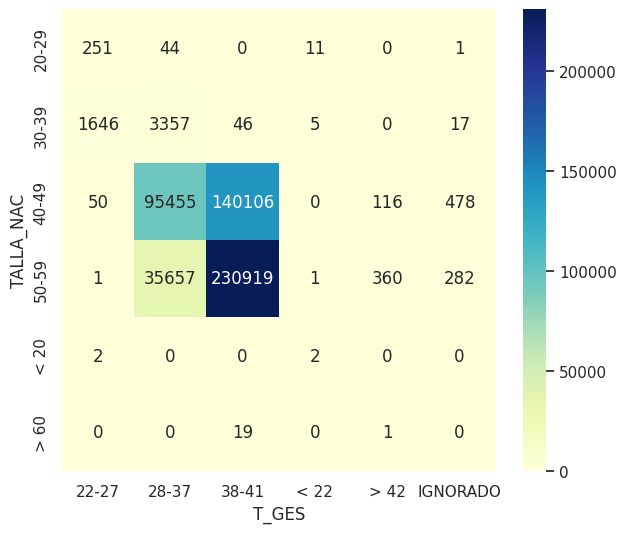

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,6))
heatmap = sns.heatmap(tabla_cont,annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.show()

In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _,_ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es {valor_p}")

El valor de la estadística Chi cuadrado es 283302.7467337464 y el valor p es 0.0


Como el valor p es < 0.05, entonces se rechaza la hipotesis nula, es decir, con una confianza del 95% no se rechaza que las variables talla de gestación y talla de nacimiento estén asociadas.  

In [ ]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df1.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df1.T_GES))
coeficiente_v_cramer = math.sqrt(chi/(len(df1.T_GES)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")


Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5980358668183134, 0.7461743542999918 y 0.7461743542999918


In [ ]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df1.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/len(df1.TALLA_NAC))
coeficiente_v_cramer = math.sqrt(chi/(len(df1.TALLA_NAC)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")


Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5980358668183134, 0.7461743542999918 y 0.7461743542999918


En conclusión, al analizar la relación entre las variables TALLA_NAC (talla al nacer) y T_GES (tiempo de gestación), se obtuvieron los siguientes coeficientes:

El coeficiente de contingencia es 0.598, lo cual indica que sí existe una asociación significativa entre ambas variables, aunque no perfecta.

El coeficiente Phi, con valor 0.746, sugiere una asociación fuerte. Phi es especialmente útil cuando se comparan tablas 2×2, pero aquí aún proporciona una buena aproximación de fuerza relacional.

El coeficiente V de Cramer, también igual a 0.746, confirma una fuerte asociación, adecuada para tablas mayores a 2×2 y más robusta que Phi en estos casos.

Además, como el valor p de la prueba Chi-cuadrado fue 0.0 < 0.05, se rechaza la hipótesis nula, lo cual significa que existe una relación estadísticamente significativa entre la talla al nacer y el tiempo de gestación.

Por tanto, se concluye que las variables TALLA_NAC y T_GES están asociadas de manera fuerte, y una variable puede dar información útil sobre la otra.


---

## $\text{4. Conclusiones}$
En primer lugar, el análisis de la variable TALLA_NAC evidenció que más del 98% de los recién nacidos presentan una talla entre 40 y 59 cm, lo cual coincide con los rangos esperados según estándares neonatales y refleja un patrón de crecimiento fetal saludable en la mayoría de los casos. En segundo lugar, al observar la variable T_GES, se encontró que cerca del 73% de los nacimientos se producen entre las 38 y 41 semanas de gestación, lo que indica un predominio de partos a término. Sin embargo, se identificó que aproximadamente el 26% corresponde a nacimientos prematuros (entre 28 y 37 semanas), lo cual constituye un dato importante para el diseño de estrategias de prevención y atención médica especializada.

Adicionalmente, la aplicación de la prueba Chi-cuadrado permitió establecer una asociación estadísticamente significativa entre las variables talla al nacer y tiempo de gestación (valor p < 0.05), lo cual se refuerza con los coeficientes de contingencia (0.598), Phi y V de Cramer (0.746), que indican una relación fuerte entre ambas variables. En consecuencia, se concluye que el tiempo de gestación influye directamente en la talla del recién nacido, y que ambas variables son interdependientes dentro del contexto del desarrollo fetal. Por tanto, estos hallazgos subrayan la importancia de una vigilancia prenatal continua y eficiente, orientada a reducir los partos prematuros y garantizar condiciones óptimas para el nacimiento.

---


## $\text{5. Referencias bibliográficas}$

* Departamento Administrativo Nacional de Estadística (DANE). (2023). Nacimientos - Año 2023. Recuperado de https://microdatos.dane.gov.co/index.php/catalog/843/data-dictionary
* Departamento Administrativo Nacional de Estadística (DANE). (2023). Diccionario de variables de nacimientos 2023. Disponible en el mismo catálogo del enlace anterior.

- Organización Panamericana de la Salud (OPS). (2020). Estadísticas vitales: principios y recomendaciones. Organización Mundial de la Salud.

- Montgomery, D. C., & Runger, G. C. (2014). Estadística aplicada y probabilidad para ingenieros (5.ª ed.). Wiley.
- Ministerio de Salud y Protección Social.(2024). Documento de orientación para la gestión territorial de las Estadísticas Vitales.